# Classificação de clientes

Este projeto tem por objetivo explorar o algoritmo K-Nearest Neighbors (K-NN) na solução de um problema de classificação. No caso a classificação de novos clientes para um determinado tipo de produto ('custcat'):

* 1 - Basic Service
* 2 - E-Service
* 3 - Plus Service
* 4 - Total Service

Os dados foram obtidos através do curso 'Machine Learning with Python', e está disponível no diretório indicado na importação.

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('data/teleCust1000t.csv') #importação do dataset

dataset.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
dataset.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


## Exploração dos dados

### Contagem de clientes por classe

In [4]:
dataset['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

Temos 281 clientes classificados como 'Plus Service', 266 como 'Basic Service', 236 são 'Total Service' e 217 'E-Service'

### Visualizando dados

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Distribuição de clientes por cada coluna

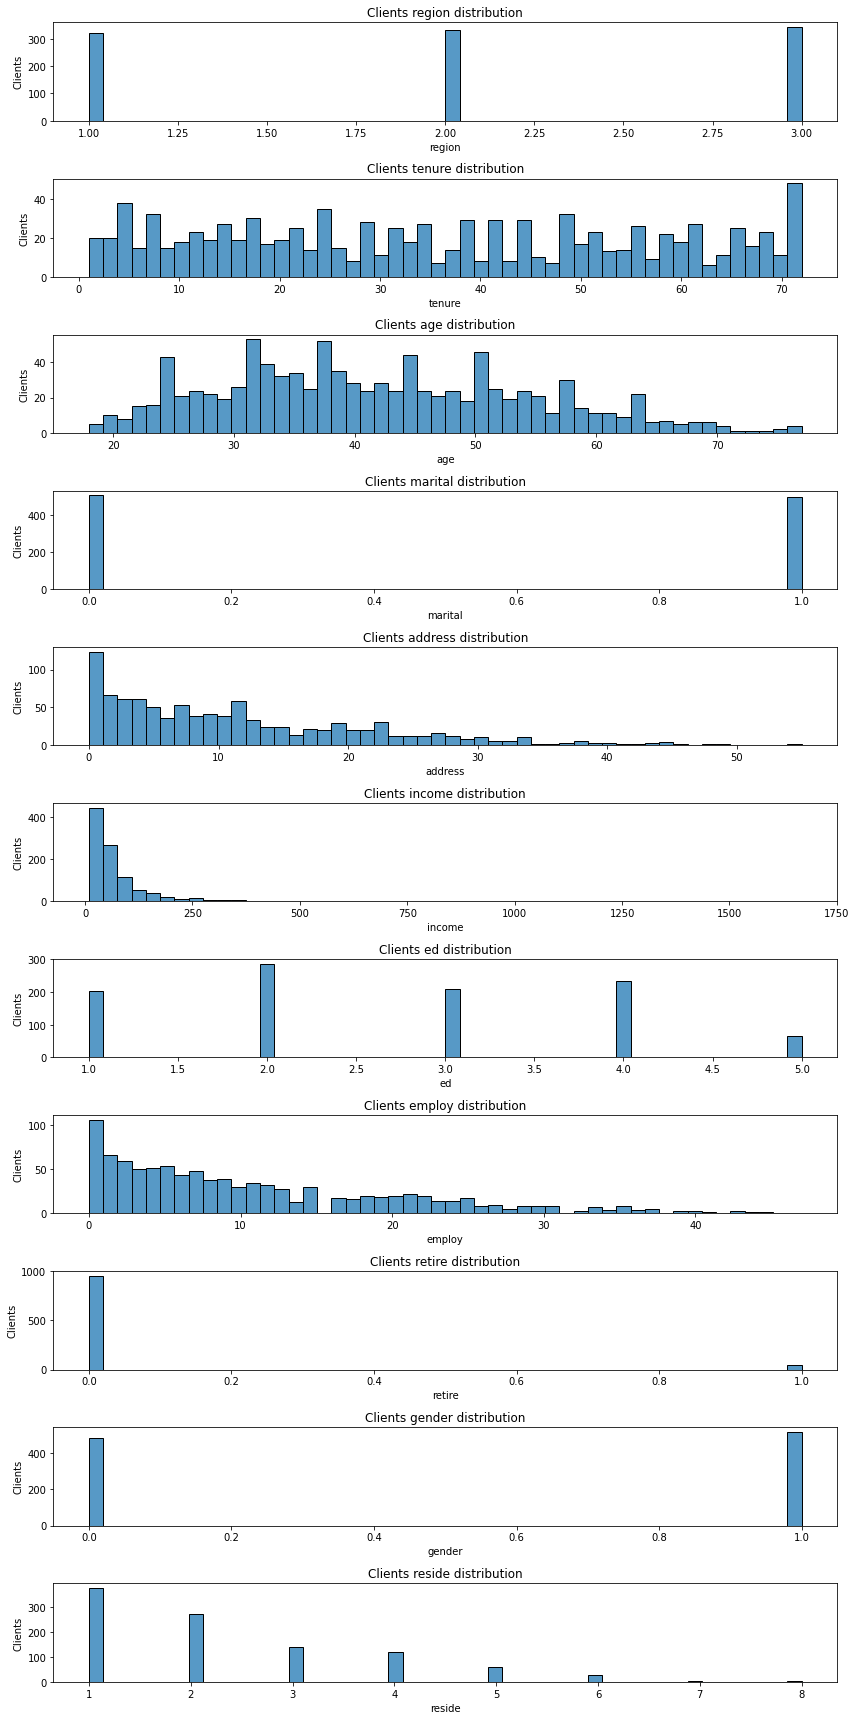

In [6]:
dataset_len = len(dataset.columns)

fig, axes = plt.subplots(nrows=dataset_len-1, figsize = (12,24))

for i in range(dataset_len-1):
    column = dataset.columns[i]
    plot = sns.histplot(data = dataset, x = column, bins = 50, ax=axes[i])
    plot.set_xlabel(column)
    plot.set_ylabel('Clients')
    plot.set_title(f'Clients {column} distribution')

fig.tight_layout()

Dados relacioanos a renda e região parecem ser mais relevantes do que dados como gênero, idade e posses na hora de diferenciar os clientes.

## Feature set

In [7]:
#Colunas selecionadas: 'region', 'address', 'income', 'employ' e 'reside'
select = ['region','address', 'income', 'employ', 'reside']

x = dataset[select].values
y = dataset['custcat'].values

### Normalize data

In [11]:
from sklearn import preprocessing

x_norm = preprocessing.StandardScaler().fit(x).transform(x.astype(float))

### Train, test, split

In [15]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=4)

print(f'Separamos {x_train.shape[0]} dados para treino e {x_test.shape[0]} para teste')

Separamos 800 dados para treino e 200 para teste
